Estimating lighting from an image has many applications in photo forensics, computer vision, and computer graphics. Consider the illuminated sphere shown below. If, as in this case, the light illuminating the sphere is distant and the sphere is a Lambertian (matte) surface, the appearance (I) of a point (X,Y,Z) on the sphere's surface that is not in shadow is equal to the dot product between the 3D surface normal (N) at (X,Y,Z) and the 3D direction to the light source (L).

You will write some Python code to estimate light direction (L) from an illuminated sphere. You can assume there is only one distant light source in the scene and there is no other illumination or ambient light.

Load the 3D X-, Y-, and Z-coordinates of the sphere and the corresponding illumination I. After loading the files you will have four 41 x 41 matrices corresponding to the illumination I and the 3D coordinates of the sphere. That is, for any u and v between 0 and 40, the illumination on the sphere's surface at (X(u,v),Y(u,v),Z(u,v)) is I(u,v).

Display this sphere using the plot_surface method in Python. Set the color values so that the displayed sphere looks like the sphere shown below.

For each (X,Y,Z) on the sphere's surface, determine the surface normal N. The surface normal at any point on the sphere is a vector from the sphere origin to the point. Since the sphere is centered at the origin, this is a simple calculation. The surface normal should be specified as a unit vector.

Using least-squares, estimate the lighting (a 3-D vector). Your solution should create an over constrained system of linear equations in the surface normal and illumination at each point (X,Y,Z) on the sphere's surface that is not in shadow (i.e. intensity is greater than zero). Your solution for the light vector L is determined by solving this system of linear equations using least-squares. Do not use numpy.linalg.pinv or any other equivalent method in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# loading the data
X = np.load('a6-X.npy')
Y = np.load('a6-Y.npy')
Z = np.load('a6-Z.npy')
I = np.load('a6-I.npy')

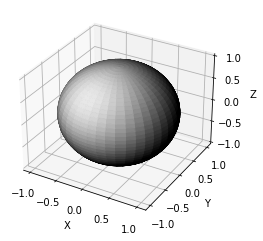

In [3]:
# plotting the data
c = plt.cm.gray(I)
ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, Z, facecolors=c)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [4]:
# flattening the arrays to get an easier format to work with
x = X.flatten()
y = Y.flatten()
z = Z.flatten()
i = I.flatten()

In [5]:
# creating a matrix of x,y,z points associated with illumination values > 0
# also creating an associated illumination matrix for the illumination values>0
vectors = []
ill = []
for j in range(len(i)):
    if i[j]>0:
        vectors.append((x[j],y[j],z[j]))
        ill.append(i[j]) 
vectors = np.array(vectors)
ill = np.array(ill)

In [6]:
# differentiating the points
d = np.array(2*vectors)

In [7]:
# calculating the magnitude
mag = np.array(np.sqrt((np.sum(np.square(d),axis=1))))

In [8]:
# creating a matrix of normal vectors
n = d
for j in range(len(mag)):
    for k in range(len(d[j])):
        n[j][k] = d[j][k]/mag[j]
n = np.array(n)

In [9]:
# calculating the solution to of the form inv(n.T@n)@n.T@ill

# first calculating n.T@n and an identity matrix
A = n.T@n
Id = np.identity(3)

In [10]:
# concatenating A and Id in order to find the inverse
M = np.concatenate((A, Id), axis=1)

In [11]:
# finding the inverse

for i in range(len(A)):
    # selecting a pivot value
    p = M[i][i]
    
    # extracting the row
    r = M[i]
  
    # 1 along the diagonal
    M[i] = r / p

    # getting matrix into reduced row echelon form
    for j in [k for k in range(0, 3) if k != i]:
        M[j] = M[j] - M[i] * M[j][i]

    # extracting the inverse matrix
    inverse = M[:, 3:]

In [12]:
# calculating solution
L = inverse@n.T@ill
print(L)

[ 0.00596716 -0.70706699  0.70705375]
